In [1]:
!pip install ultralytics==8.0.196 -q
!pip install roboflow -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 631.1/631.1 kB 20.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 70.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 61.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 41.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 53.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.1/83.1 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6

In [2]:

from roboflow import Roboflow
rf = Roboflow(api_key="7tzC2mpFl1iCRQf7KbnB")
project = rf.workspace("datasets-rxtdh").project("passport-detection-l0pjf-byfub")
version = project.version(1)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to passport-detection-1 in yolov8:: 100%|██████████| 1670/1670 [00:00<00:00, 2062.64it/s]


In [ ]:
!yolo task=detect mode=train model=yolov8n.pt data='/content/passport-detection-1/data.yaml' epochs=50

100% 6.23M/6.23M [00:00<00:00, 122MB/s]
/usr/local/lib/python3.11/dist-packages/ultralytics/nn/tasks.py:567: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(

In [ ]:
!yolo export model='/content/runs/detect/train/weights/best.pt' format=onnx

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu118 CPU (Intel Xeon 2.30GHz)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

PyTorch: starting from '/content/runs/detect/train/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 5, 8400) (6.0 MB)
requirements: Ultralytics requirement ['onnx>=1.12.0'] not found, attempting AutoUpdate...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 248.4 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 7.0s, installed 1 package: ['onnx>=1.12.0']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.15.0 opset 17...
ONNX: export success ✅ 8.1s, saved as '/content/runs/detect/train/weights/best.onnx' (11.7 MB)

Export complete (10.2s)
Results saved to /content/runs/detect/train/weights
Predict:         yolo predict task=detect model=/content/runs/detect/train/weights/best.onnx imgsz=640  
Validate:        yolo val 

In [ ]:
!yolo benchmark model=yolov8n.pt data='/content/runs/detect/train/weights/best.pt' imgsz=640 half=False device=0


image 1/1 /usr/local/lib/python3.10/dist-packages/ultralytics/assets/bus.jpg: 640x480 4 persons, 1 bus, 1 stop sign, 102.8ms
Speed: 3.4ms preprocess, 102.8ms inference, 81.4ms postprocess per image at shape (1, 3, 640, 480)
ERROR ❌️ Benchmark failure for PyTorch: Dataset '/content/runs/detect/train/weights/best.pt' for task=detect not found ❌

PyTorch: starting from 'yolov8n.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 84, 8400) (6.2 MB)

TorchScript: starting export with torch 2.1.0+cu118...
TorchScript: export success ✅ 1.1s, saved as 'yolov8n.torchscript' (12.4 MB)

Export complete (1.2s)
Results saved to /content
Predict:         yolo predict task=detect model=yolov8n.torchscript imgsz=640  
Validate:        yolo val task=detect model=yolov8n.torchscript imgsz=640 data=coco.yaml  
Visualize:       https://netron.app
Loading yolov8n.torchscript for TorchScript inference...

image 1/1 /usr/local/lib/python3.10/dist-packages/ultralytics/assets/bus.jpg: 640x640 4

In [ ]:
from ultralytics import YOLO

In [ ]:
model = YOLO('/content/runs/detect/train/weights/best.pt')

In [ ]:
results = model('/content/Group of people.jpg', show=True)

WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()


image 1/1 /content/Group of people.jpg: 448x640 3 faces, 93.8ms
Speed: 3.6ms preprocess, 93.8ms inference, 2.5ms postprocess per image at shape (1, 3, 448, 640)


In [ ]:
!yolo task=detect mode=predict model='/content/runs/detect/train/weights/best.pt' source='https://encrypted-tbn3.gstatic.com/licensed-image?q=tbn:ANd9GcS_Q-fRFfDWAEfOcz_R0vktnglTXYO4EKn9z8bBlX6mgl4cobbtQ8K4KZFq46SSM4ArMq51ma5AZGxc62Y'

In [ ]:
from IPython.display import

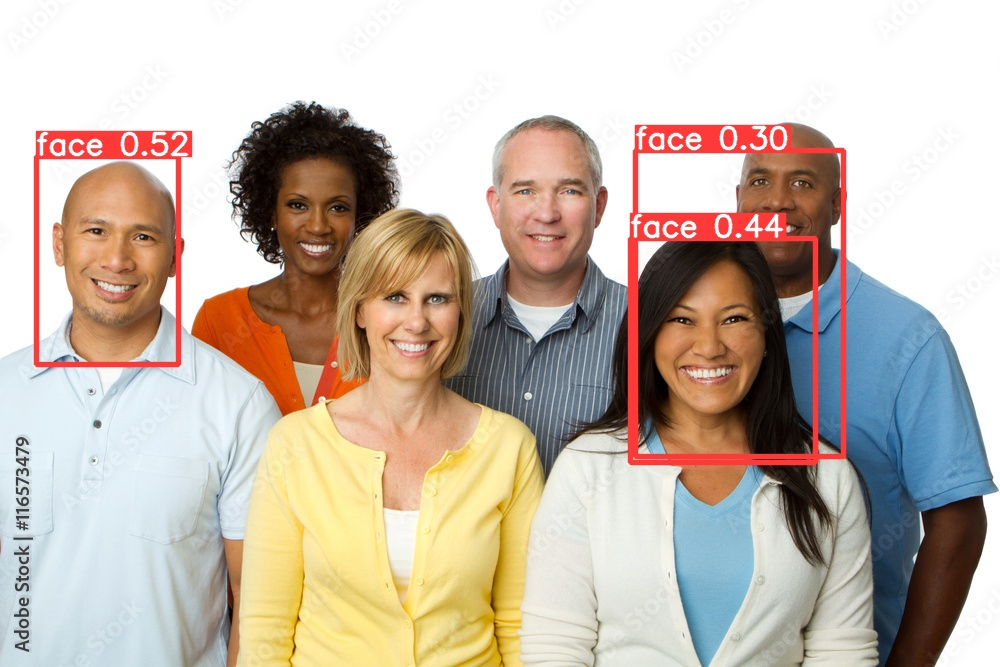

In [ ]:
Image(filename='/content/runs/detect/predict4/licensed-image_q_tbn_ANd9GcS_Q-fRFfDWAEfOcz_R0vktnglTXYO4EKn9z8bBlX6mgl4cobbtQ8K4KZFq46SSM4ArMq51ma5AZGxc62Y.avi')

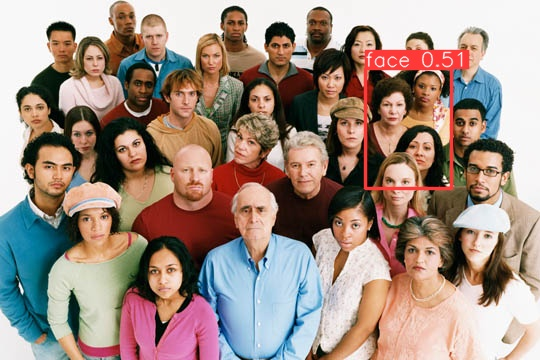

In [ ]:
Image(filename='/content/runs/detect/predict2/diverse-group-of-people.jpg')

In [ ]:
Image(filename='/content/runs/detect/predict/Group of people.jpg')